## NLP 데이터 마이닝 

# 1.데이터 수집 및 준비하기

가지고 있는 데이터가 없음으로 자체적으로 데이터를 수집하고 처리하는 방법으로 NLP 데이터 마이닝 과정을 수행하기로 했다. 먼저 웹 스크래핑을 통해 웹 사이트에서 원시 데이터를 수집하고, 사이트의 정보를 수집하고 웹 스크래퍼를 구축한다.

1. 필수 라이브러리/패키지 가져오기
- request 패키지를 사용하여 파이썬 스크립트가 웹사이트와 통신하고 해당 사이트에서 정보를 요청할 수 있다.
- 뷰티플 수프 패키지를 이용한다. bs4는 웹사이트에서 정보를 얻고 추출하는데 유용한 기능을 제공한다.

In [2]:
import requests
import bs4
print ("당신의requests version가 성공적으로 임포트가 되었다. 버전: "+requests.__version__)
print ("당신의 beautifulsoup version가 성공적으로 임포트 되었다. 버전:"+bs4.__version__)

당신의requests version가 성공적으로 임포트가 되었다. 버전: 2.27.1
당신의 beautifulsoup version가 성공적으로 임포트 되었다. 버전:4.11.1


이렇게 하면 패키지가 잘 임포트 되었다는 뜻이다.

## 1. 웹 사이트에 대한 정보를 찾기

- https://en.wikipedia.org/wiki/Jupiter에 페이지를 가져올 것이다.

- 페이지가 보이면  ctrl-shift-i (또는 F12)를 눌러 사이트의 HTML을 확인한다.

- 웹사이트로 들어가지면 html을 사용하는 인터넷에 요청을 전송하고 기다려야한다. 응답은 응답 코드와 요청된 정보를 보내고, 컴퓨터는 이 정보를 브라우저에 표시하게 된다.

## 2. 함수를 사용하여 웹 사이트를 호출하기

- requests.get() 함수를 사용하여 웹 사이트를 호출한다. request.get() 함수는 'GET' 요청을 웹 사이트 주로소 전송하고, 응답을 검색하려고 할 것이다. request.get() 함수는 'Response [200]'을 반환해야한다. 왜냐하면 사이트에서 정보를 성공적으로 수신했음을 의미를 주기 위해서

In [3]:
base_url = 'https://en.wikipedia.org/wiki/Jupiter'
r = requests.get(base_url)
r

<Response [200]>

## 3. 웹 사이트에서 데이터를 얻기 위한 beautifulsoup 사용

- bs4를 사용하면 웹 사이트에 요청하여 출력을 읽을 수 있다..

- beautifulsoup는 HTML, XML 및 기타 마크 업 언어에서 데이터를 가져오는 파이썬 라이브러리

- 브라우저와 마찬가지로, bs4는 HTML을 이해하고 < 태그 >를 읽을 수 있습니다

In [4]:
#`r.text`에는 이전에 GET 요청을 했을 때 반환된 원시 HTML이 포함되어 있습니다. 
#`'html5lib'`는 BeautifulSoup에 HTML 정보를 읽고 있다고 알려줍니다. 
soup = bs4.BeautifulSoup(r.text,'html5lib')

- 기본적으로 GET 요청에서 초기 응답을 받아 BeautifulSoup에 응답을 읽고 이해하도록 요청하고, 이 모든 것을 변수 soup으로 저장한다.

## 4. beautifulsoup을 사용하여 특정 태그 검색

- BeautifulSoup은 특정 태그를 검색하는 데 사용할 수 있다.

- 테스트로 beautifulsoup을 사용해 위키피디아 웹 사이트의 모든 제목을 찾아 보자.

In [5]:
headers = []
for url in soup.findAll("h3"):
    headers.append(url.text)
    print(url.text)

Composition
Size and mass
Internal structure
Atmosphere
Magnetosphere
Planetary rings
Pre-telescopic research
Ground-based telescope research
Space-based telescope research
Radiotelescope research
Exploration
Galilean moons
Classification
Impacts


- 위 코드에서는 우리가 h3 태크를 찾았다. 다음 발견한 모든 태크에 루프를 사용하여 텍스트를 추출해보자

- 이제 headers의 모든 링크를 수집 할 수 있는지 확인해 보겠다. 변수 headers를 표시하고 이 변수에 정보다 추가되었는지 확인할 수 있다.

In [6]:
print(headers)

['Composition', 'Size and mass', 'Internal structure', 'Atmosphere', 'Magnetosphere', 'Planetary rings', 'Pre-telescopic research', 'Ground-based telescope research', 'Space-based telescope research', 'Radiotelescope research', 'Exploration', 'Galilean moons', 'Classification', 'Impacts']


- 여기서 보면 목록의 일부 항목은 관련이 없는 정보이다. 이렇게 되는 이뉴는 일부 헤더가 목록에 포함되어 있기 때문이다.

In [7]:
i = len(headers) - 1
counter = 0
while counter <= i:
    if headers[counter].startswith('\n'):
        headers.pop(counter)
        counter -= 1
    counter += 1
    i = len(headers) -1
print(headers)

['Composition', 'Size and mass', 'Internal structure', 'Atmosphere', 'Magnetosphere', 'Planetary rings', 'Pre-telescopic research', 'Ground-based telescope research', 'Space-based telescope research', 'Radiotelescope research', 'Exploration', 'Galilean moons', 'Classification', 'Impacts']


- 각 헤더 뒤의 단락 태그에서 각 제목의 단락 텍스트를 추출한다. 하나의 헤더에서 대해 어떠한 방법으로 수행되는지 확인하고, 원하는 모든 헤더에 대해 수행할 수 있다.

- 만약 모든 단락을 찾고 싶다 p 태그를 찾아서. .get_text() 호출하여 실제 단어를 감색하면 된다.

In [8]:
r = requests.get(base_url)
soup = bs4.BeautifulSoup(r.text,'html5lib')
deet = soup.find('h3', text = headers[0]) # 클래스 'entry-content content' 의 div 태그 검색
para = deet.find_next_sibling('p') # 이 태그 안에서 모든 p 태그 검색
print(para.get_text())

By mass, Jupiter's atmosphere is approximately 76% hydrogen and 24% helium, though, because helium atoms are more massive than hydrogen molecules, Jupiter's upper atmosphere is about 90% hydrogen and 10% helium by volume.[41] The atmosphere also contains trace amounts of methane, water vapour, ammonia, and silicon-based compounds. There are also fractional amounts of carbon, ethane, hydrogen sulfide, neon, oxygen, phosphine, and sulfur. The outermost layer of the atmosphere contains crystals of frozen ammonia. Through infrared and ultraviolet measurements, trace amounts of benzene and other hydrocarbons have also been found.[42] The interior of Jupiter contains denser materials—by mass it is roughly 71% hydrogen, 24% helium, and 5% other elements.[43][44]



- 위에 코드에서는 find_next_sibling함수를 사용하여 구성으로 레이블된 헤어 다음에 오늘 단락 태그를 가져온다.

In [9]:
r = requests.get(base_url)
soup = bs4.BeautifulSoup(r.text,'html5lib')
deet = soup.find('h3', text = headers[0]) # 클래스 'entry-content content' 의 div 태그 검색

for para in deet.find_next_siblings(): # 이 태그 안에서 모든 p 태그 검색
    if para.name == "h2" or para.name == "h3":
        break
    elif para.name == "p":
        print(para.get_text())

By mass, Jupiter's atmosphere is approximately 76% hydrogen and 24% helium, though, because helium atoms are more massive than hydrogen molecules, Jupiter's upper atmosphere is about 90% hydrogen and 10% helium by volume.[41] The atmosphere also contains trace amounts of methane, water vapour, ammonia, and silicon-based compounds. There are also fractional amounts of carbon, ethane, hydrogen sulfide, neon, oxygen, phosphine, and sulfur. The outermost layer of the atmosphere contains crystals of frozen ammonia. Through infrared and ultraviolet measurements, trace amounts of benzene and other hydrocarbons have also been found.[42] The interior of Jupiter contains denser materials—by mass it is roughly 71% hydrogen, 24% helium, and 5% other elements.[43][44]

The atmospheric proportions of hydrogen and helium are close to the theoretical composition of the primordial solar nebula. Neon in the upper atmosphere only consists of 20 parts per million by mass, which is about a tenth as abundan

## 5. headers 항목을 반복할 수 있는 함수를 작성해보면

- 각 헤더의 내용을 먼저 추출해야한다. 그리고 모든 텍스트를 변수 "all_para"에 결합한다.

In [10]:
r = requests.get(base_url)
soup = bs4.BeautifulSoup(r.text,'html5lib')
deet = soup.find('h3', text = headers[0]) # 클래스 'entry-content content' 의 div 태그 검색

for all_para in deet.find_next_siblings(): # 이 태그 안에서 모든 p 태그 검색
    if all_para.name == "h2" or all_para.name == "h3":
        break
    elif all_para.name == "p":
        print(all_para.get_text())

By mass, Jupiter's atmosphere is approximately 76% hydrogen and 24% helium, though, because helium atoms are more massive than hydrogen molecules, Jupiter's upper atmosphere is about 90% hydrogen and 10% helium by volume.[41] The atmosphere also contains trace amounts of methane, water vapour, ammonia, and silicon-based compounds. There are also fractional amounts of carbon, ethane, hydrogen sulfide, neon, oxygen, phosphine, and sulfur. The outermost layer of the atmosphere contains crystals of frozen ammonia. Through infrared and ultraviolet measurements, trace amounts of benzene and other hydrocarbons have also been found.[42] The interior of Jupiter contains denser materials—by mass it is roughly 71% hydrogen, 24% helium, and 5% other elements.[43][44]

The atmospheric proportions of hydrogen and helium are close to the theoretical composition of the primordial solar nebula. Neon in the upper atmosphere only consists of 20 parts per million by mass, which is about a tenth as abundan

In [11]:
print(all_para)

<h3><span class="mw-headline" id="Size_and_mass">Size and mass</span></h3>


## 6. 데이터 저장

1. 이제 데이터에 접근할 때 만다 웹 사이트를 스크랩할 필요가 없도록 데이터를 저장하는 방법이 필요하다.
수집된 정보가 있고 이제 저장만 하면 웹사이트가 삭제되거나 변경되도 데이터는 보존이 될 것이다.

### 먼저 데이터를 텍스트 파일로 저장해야한다.

In [12]:
with open('./wiki.txt', 'wb') as file_handler:
        file_handler.write(all_para.encode('utf8'))

open(filename)으로 파일 개체를 만들고, 그런 다음 .write() 속성을 사용하여 텍스트를 파일에 기록한다.

### 기타 데이터 소스 가져오기

웹 사이트마다 html 구조가 다르기 때문에 스크랩하는 각 사이트마다 코드를 수정해줘야한다. 웹 사이트의 차이점을 신경쓰지 않고 많은 데이터를 얻는 방법은 .csv, .txt와 같은 문서 형식으로 저장할 수 있으며 간단한 스크립트로 쉽게 다운로드 할 수 있다.

트위터에서 소셜 미디어 반응을 확인하는 데이터 세트를 살펴보기로 했다. 일단 트윗을 분류를 할 수 있게 되면 실제 재난 시 노이즈 정보를 걸러내고 유용한 트윗 정보를 실시간으로 얻을 수 있다. 트윗에는 일단 피해야할 장소, 도움이 되는 방법, 도움을 요청하는 방법등 유용한 정보가 포함될 수 있다.

In [13]:
import urllib

url = 'https://sl2files.sustainablelivinglab.org/DatasetSocialMedia-Disaster-tweets-DFE.csv'

csv = urllib.request.urlopen(url).read()
with open('./[Dataset] Module 24 (socialmedia disaster tweets DFE).csv', 'wb') as fx:
    fx.write(csv)

urllib 라이브러리는 사용하여 'url'에 있는 .csv 파일을 다운로드하고 저장하였다.

### 텍스트 처리

일단 로우 데이터 형태는 텍스트의 문자열이다. 컴퓨터가 이해하고 작업할 수 있는 형태로 분할 하는 전처리 단계를 수행해야한다.

이렇게 텍스트를 전처리하면 텍스트를 분석하고 시각화할 수 있으며, 컴퓨터가 텍스트를 분류하는데 사용할 수 있는 트렌드 및 기능을 찾을 수 있다.

먼저 패키지를 가져오는데
1. pandas 패키지로 데이터 프레임 구조로 파일을 프로그램에 로드할 것이다.
2. nltk 패키지는 텍스트를 가공하고 시각화할 수 있도록 해준다.

In [14]:
import pandas as pd
import nltk

print ("You have successfully imported pandas version "+pd.__version__)
print ("You have successfully imported nltk version "+nltk.__version__)

You have successfully imported pandas version 1.4.2
You have successfully imported nltk version 3.7


In [15]:
# 자연 재해에 대한 트윗이 포함된 csv 파일을 pandas dataframe으로 읽습니다.
df_raw = pd.read_csv('[Dataset] Module 24 (socialmedia disaster tweets DFE).csv',encoding='ISO-8859-1')

print ("You have successfully loaded your csv file")

You have successfully loaded your csv file


이제 가져온 데이터 자료로 데이터프레임에서 데이터의 첫 5줄을 살펴봐야한다.

In [16]:
df_raw.head(5)

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


pandas 데이터프레임은 스프레드시트처럼 데이터의 범주가 포함되어 있으며, 각 행은 단일 트윗의 정보를 나타낸다.

### 다른 열을 살펴보고 싶을때...

In [17]:
df_raw['text']

0                       Just happened a terrible car crash
1        Our Deeds are the Reason of this #earthquake M...
2        Heard about #earthquake is different cities, s...
3        there is a forest fire at spot pond, geese are...
4                   Forest fire near La Ronge Sask. Canada
                               ...                        
10871    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872    Police investigating after an e-bike collided ...
10873    The Latest: More Homes Razed by Northern Calif...
10874    MEG issues Hazardous Weather Outlook (HWO) htt...
10875    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

### 트윗의 몇개의 무작위 표본을 살펴보고 싶을 때

In [18]:
list(df_raw['text'].sample())

['Romantic dramatic but never panic original sensei write rhymes in the attic']

각 행은 단일 트윗에서 수집된 데이터이므로 데이터 세트에서 전체 트윗 수를 어떻게 찾을 수 있는지 len(dataframe)을 사용하여 데이터 프레임의 행 수를 계산한다.

In [19]:
df_raw['text']

0                       Just happened a terrible car crash
1        Our Deeds are the Reason of this #earthquake M...
2        Heard about #earthquake is different cities, s...
3        there is a forest fire at spot pond, geese are...
4                   Forest fire near La Ronge Sask. Canada
                               ...                        
10871    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872    Police investigating after an e-bike collided ...
10873    The Latest: More Homes Razed by Northern Calif...
10874    MEG issues Hazardous Weather Outlook (HWO) htt...
10875    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [20]:
len(df_raw)

10876

이제 텍스트에 집중하기 위해 나머지 필요하지 않은 열은 제외하고 텍스트만 포함하는 새로운 데이터 프레임을 만들었다.

In [21]:
df_text = df_raw['text'].copy()

In [22]:
df_text.head(5)

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

## 7. 데이터 전처리

기본적인 예로 욕설 필터링을 전처리 해보기호 한다. AI모델이 좋은 단어와 나쁜 단어를 구분할 수 없기 때문에 예측 데이터를 순진하게 욕설들의 나쁜 단어로 출력할 수 있기 때문에 정리된 좋은 단어의 데이터만으로 모델을 훈련시키는 것이 맞다.

In [23]:
## 불필요한 단어 제거
## 데이터 집합에서 'stupid'라는 단어가 발생하는 횟수를 확인
frequecy_of_word=0
for i in range(len(df_raw)):
    x=df_raw["text"][i]
    if "stupid" in x:
        frequecy_of_word+=1
    else:
        continue

print("The frequency of the word stupid is :",frequecy_of_word)

The frequency of the word stupid is : 1


In [24]:
for i in range(len(df_raw)):
    x=df_raw['text'][i]
    x=x.replace("stupid","") # 'stupid' 단어를 공백으로 대체
    df_raw.loc[:, ('one', 'second')]=x
    

    
    
frequecy_of_word=0
for i in range(len(df_raw)):
    x=df_raw["text"][i]
    if "stupid" in x:
        frequecy_of_word+=1
    else:
        continue

print("The frequency of the word stupid is :",frequecy_of_word)

The frequency of the word stupid is : 1


## 8. 토큰화 작업

토큰화는 nltk.tokenize.word_token(데이터)를 호출하여 수행됩니다. 토큰화 전후의 텍스트를 출력하여 함수가 수행한 기능을 확인할 수 있다.

In [25]:
sample_tweet = df_text.iloc[100]
print('Before tokenization:', sample_tweet)

Before tokenization: http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour


In [26]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
tokenized_tweet = nltk.tokenize.word_tokenize(sample_tweet)
print('After tokenization:', tokenized_tweet)

After tokenization: ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


In [28]:
tokenized_raw = [nltk.tokenize.word_tokenize(x) for x in list(df_text)] # 각 트윗이 토큰 목록이 되는 트윗 목록 만들기
len(set([y for x in tokenized_raw for y in x])) # 목록을 단일 목록으로 지정한 후 고유 토큰 수를 계산합니다.


34878

### 9.어간추출(Stemming)과 표제어 추출(Lemming)

nltk.stem.PorterStemmer()과 nltk.stem.WordNetLemmatizer()를 사용했다. 출력을 보고 위의 토큰화된 텍스트와 비교하여 각 도구의 차이점을 확인해봐야할 것 같다.

In [29]:
import nltk
nltk.download()

porter = nltk.stem.PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stemmed = [porter.stem(word) for word in tokenized_tweet]
print(stemmed)
lemmed = [wnl.lemmatize(word) for word in tokenized_tweet]
print(lemmed)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['http', ':', '//t.co/gkye6gjtk5', 'had', 'a', '#', 'personalinjuri', 'accid', 'thi', 'summer', '?', 'read', 'our', 'advic', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'otleyhour']
['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


스티머(stemmer)는 의미는 같지만 형태가 다른 단어들이 결국 같은 토큰으로 끝나도록 단어를 짧게 만들어준다. 예를 들면 accident 토큰을 accid로 줄여주고 accidentally, accidental, accidents와 같은 다른 비슷한 단어들은 모두 accid로 되는 것 이다.

레마티저(lemmatizer)는 동일한 의미로 단어를 검색하고 어근으로 대체하는 것이다. 쉽게 말하면 동일한 의미를 가진 단어들은 컴퓨터가 하나의 단어로 이해할 수 있도록 한다. 
여기서 단점은 내 컴퓨터가 안좋은건지 실행이 원래 오래 걸리는지 모르겠다.

### 10. 금지어(stop-word)제거

In [30]:
stop = nltk.corpus.stopwords.words('english')
# 여기에서 제거하고 싶은 금지어를 추가합니다.
stop.append('@')
stop.append('#')
stop.append('http')
stop.append(':')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

이렇게 한 다음 데이터 프레임을 가져와서 토큰화된 트윗을 반환하는 함수를 만들 수 있다.

In [31]:
def process_tweet(tweet):
    tokenized_tweet = nltk.tokenize.word_tokenize(tweet)
    stemmed = [porter.stem(word) for word in tokenized_tweet]
    processed = [w.lower() for w in stemmed if w not in stop]
    return processed

def tokenizer(df):
    tweets = []
    for _, tweet in df.iterrows():
        tweets.append(process_tweet(tweet['text']))
    return tweets

tweets = tokenizer(df_raw)

이제 가공이된 트윗을 볼 수 있다. 잘라낸 단어가 많이 보일 것이다. 예를 들면 terrible 대신 terribl

In [32]:
tweets

[['happen', 'terribl', 'car', 'crash'],
 ['deed', 'reason', 'thi', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['heard', 'earthquak', 'differ', 'citi', ',', 'stay', 'safe', 'everyon', '.'],
 ['forest',
  'fire',
  'spot',
  'pond',
  ',',
  'gees',
  'flee',
  'across',
  'street',
  ',',
  'save'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', '.', 'canada'],
 ['resid',
  'ask',
  "'shelter",
  'place',
  "'",
  'notifi',
  'offic',
  '.',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['13,000', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california'],
 ['got',
  'sent',
  'thi',
  'photo',
  'rubi',
  'alaska',
  'smoke',
  'wildfir',
  'pour',
  'school'],
 ['rockyfir',
  'updat',
  '=',
  '>',
  'california',
  'hwi',
  '.',
  '20',
  'close',
  'direct',
  'due',
  'lake',
  'counti',
  'fire',
  '-',
  'cafir',
  'wildfir'],
 ['apocalyps', 'light', '.', 'spokan', 'wildfir'],
 ['flood',
  'disast',
  'heavi',
  'rain',
  'caus',
  'flash',
  'flood',
  's

In [34]:
len(set([y for x in tweets for y in x]))
#처리된 단어의 크기를 출력한 결과

25916

### 11. 데이터 시각화

데이터 시각화를 통해서 각 트윗의 단어 수 분포를 살펴봐야한다. 가장 일반적인 단어의 수가 무엇인지, 데이터 세트를 분류하는 과정에서 모델이 트윗의 길리, 단어 수 들과 같은 요소를 확인하기 위해서이다. 

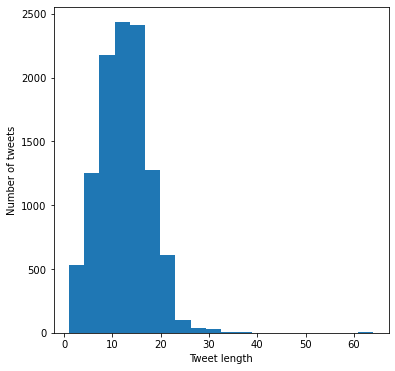

In [35]:
import matplotlib.pyplot as plt
def plot_hist(tweets):
    sentence_lengths = [len(tokens) for tokens in tweets]
    fig = plt.figure(figsize=(6, 6)) 
    plt.xlabel('Tweet length')
    plt.ylabel('Number of tweets')
    plt.hist(sentence_lengths, bins=20)
    plt.show()
    return sentence_lengths
tweet_lengths = plot_hist(tweets)